# Wildlife Trade Exploration with Python
---

**What example of Wildlife Trade are we examining?**    
Trade from 1975 to 2022 of all eight species of Pangolin, which became illegal for commercial purposes in early 2017 (having been uplisted to CITES Appendix I in late 2016).

**What scientific approaches are we taking?**    
Graph-theoretic and network science approaches.

**What outputs will we develop?**    
Network graph data structure and visualisations of this.

**What will our outputs tell us?**      
Support identification of the countries most involved in the legal Pangolin trade to-date, and the main international trading partnerships.

**Beyond the well-known Eco impacts of Wildlife Trade, what makes this example significant?**    
Pangolins are currently the world’s most trafficked wild mammal, despite the 2017 global commercial trade ban. In fact, many sources report that illegal Pangolin trade has actually grown post-ban, with the expansion of criminal networks.     
    
Tackling their illegal trade is therefore an urgent conservation priority, and being able to identify the countries who were known to be most active in the legal Pangolin trade, (the aim of this example), is likely to have some predictive power in terms of tracing the apparently thriving black market.

---
**Data source - Pangolin Trade**
* Tutorial filename: `WildlifeTradeExp_DATA.csv`
* Org: CITES (Secretariat of the Convention on International Trade in Endangered Species of Wild Fauna and Flora), a multilateral treaty to protect endangered plants and animals from the threats of international trade administered by the UN Environment Programme (UNEP).
* Resource: CITES Trade Database, which holds the official data provided by all Parties to the Convention in their mandatory annual reports on their trade in the species listed in the Convention’s Appendices. The Database currently includes over 23 million records gathered from these reports since CITES entered into force in 1975 -> https://trade.cites.org/
* Alternative access to Resource: CITES Wildlife TradeView (user dashboard/front-end for CITES Trade Database) -> https://tradeview.cites.org/
---

## A. Set-up Jupyter Notebook & Pangolin Trade data

> **A0.** Import the third-party packages numpy, pandas, networkx, and the matplotlib.pyplot submodule with conventional aliases.
>```
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
```

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

>**A1.** For autocompletion, or if it's not working, try running this magic command. 
>```
%config Completer.use_jedi = False
```

>**A2.** Read-in the Pangolin trade data `"WildlifeTradeExp_DATA.csv"`, and assign to `raw_data`. 
>```
raw_data = pd.read_csv("WildlifeTradeExp_DATA.csv")
```

In [2]:
raw_data = pd.read_csv("WildlifeTradeExp_DATA.csv")

>**A3.** Make a copy of `raw_data` called `df_prep`. This will be the `DataFrame` we will prep and ultimately construct our network graph from.
>```
df_prep = raw_data.copy()
```

In [3]:
df_prep = raw_data.copy()

---
## B. Inspect the data

>**B0.** Have a look at the prep `DataFrame`, using `head()` to display the first 5 rows.
>```
df_prep.head()
```

In [4]:
df_prep.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,1977,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,FR,GB,XX,NaN,4.0,skins,NaN,NaN,NaN
1,1977,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,US,ES,XX,215.0,NaN,shoes,NaN,NaN,NaN
2,1977,II,Manis javanica,Mammalia,Pholidota,Manidae,Manis,US,FR,ID,NaN,444.0,skins,NaN,NaN,NaN
3,1977,II,Manis pentadactyla,Mammalia,Pholidota,Manidae,Manis,AU,CN,NaN,2.0,NaN,live,NaN,NaN,NaN
4,1978,II,Manis crassicaudata,Mammalia,Pholidota,Manidae,Manis,US,JP,XX,298.0,NaN,skins,NaN,NaN,NaN


<font color='green'>***B0. Comments***     
*- A pandas `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different data types. They can be indexed and sliced by both integer position (from `0` to `-1`), and label.*    
*- Each column in a `DataFrame` is a pandas `Series` data structure, a 1-dimensional array with a labeled axis.*     
*- Not all transactions have data for every column. pandas has marked these missing entries with `NaN`, which stands for "Not a Number".*

>**B1.** Find out the dimensions of `df_prep`, i.e. the number of rows and columns in the `DataFrame`.
>```
df_prep.shape
```

<font color='green'>***B1. Interpretation***    
*- This dataset records 1,689 transactions where Pangolin commodities were traded, which date between 1975-2022.*

>**B2.** See what type of data (`dtype`) pandas inferred was in each column when it originally read-in the `WildlifeTradeExp_DATA.csv`.
>```
df_prep.dtypes
```

<font color='green'>***B2. Comment***        
*- The `object` `dtype` is one way that pandas stores string data.*

---
## C. Prepare the data for exploring Illegal Wildlife Trade (IWT)

<font color ='green'>***C0. Context***   
*- The original data request from CITES deliberately did not filter trade based on any recorded purposes. Let's review CITES "Purpose codes" (as per the database documentation https://trade.cites.org/cites_trade_guidelines/en-CITES_Trade_Database_Guide.pdf):*

**CITES Trade Database Guide - Annex 3. Purpose and source codes**    
* B Breeding in captivity or artificial propagation
* E Educational
* G Botanical garden
* H Hunting trophy
* L Law enforcement/judicial/forensic
* M Medical (including biomedical research)
* N Reintroduction or introduction into the wild
* P Personal
* Q Circus or travelling exhibition
* S Scientific
* T Commercial
* Z Zoo

>**C0.** Access the subset of `df_prep` containing just the transactions driven by the types of demand that could be more likely to persist after a ban, i.e. for `Hunting trophy`, `Personal`, `Circus or travelling exhibition`, or `Commercial` purposes, as well as where this data is missing. Reassign `df_prep` to point to the copied subset.    
>
> **Code Detail:** Use Boolean masking/indexing to return the dataframe with just the rows with the `"Purpose"` column value of either `"H"`, `"P"`, `"Q"`, `"T"`, or `np.nan`. 
>```
df_prep = df_prep[df_prep["Purpose"].isin(["H", "P", "Q", "T", np.nan])].copy()
```

In [5]:
df_prep = df_prep[df_prep["Purpose"].isin(["H", "P", "Q", "T", np.nan])].copy()

>**C1.** Check that `df_prep` has fewer rows than before.
>```
df_prep.shape
```

>**C2.** We need to be able to quantitatively compare transactions in the dataset in terms of the volume of wild Pangolin specimens lost.     
Compute a quick histogram/frequency table of the `"Term"` column values, to see the different Pangolin commodities traded.
>```
df_prep["Term"].value_counts(dropna=False)
```

In [6]:
df_prep["Term"].value_counts(dropna=False)

skins                       428
shoes                       251
derivatives                 111
leather items                95
live                         86
bodies                       80
leather products (small)     77
scales                       76
skin pieces                  60
medicine                     47
unspecified                  17
meat                         12
trophies                     10
specimens                     8
claws                         7
feet                          6
leather products (large)      6
carvings                      4
garments                      3
leather                       3
tails                         3
skulls                        2
skeletons                     1
powder                        1
skin scraps                   1
fur product (small)           1
Name: Term, dtype: int64

>**C3.** As a necessary but imperfect approach to standardising the trades, subset `df_prep` for the transactions involving commodities where each unit is more likely to represent one Pangolin animal taken from the wild (rather than a constituent part), i.e. `skins`, `live`, `bodies`, `trophies`, and `specimens`. Be aware our remaining data will significantly undercount relevant traded Pangolin numbers.
>
>**Code Detail:** Perform Boolean masking/indexing again to return the dataframe with just the rows where the element in the `"Term"` columns is one of the relevant string values. Reassign `df_prep` to point to the copied subset.
```
df_prep = df_prep[df_prep["Term"].isin(["skins", "live", "bodies", "trophies", "specimens"])].copy()
```

In [7]:
df_prep = df_prep[df_prep["Term"].isin(["skins", "live", "bodies", "trophies", "specimens"])].copy()

>**C4.** Check that `df_prep` now has even fewer rows than before.
>```
df_prep.shape
```

<font color='green'>***C4. Comment***     
*- We have cut the number of Pangolin transactions in our dataset from 1,689 originally, to 1,396 to now 612.*       
*- Whilst the steps taken in this section to clean the original dataset have undoubtedly dropped relevant data as well as retained less relevant data, these remaining 612 trade records are still a useful subset for demonstrating a Python-enabled graph-theoretic approach, and being able to derive limited, but interpretable outputs related to real-world IWT.*

---
## D. Prepare the data for network graph construction 

<font color="green">***D0. Intro***     
*- As previewed, we are preparing to turn our Pangolin trade data into a network graph where the nodes (vertices) represent the countries importing and exporting Pangolin commodities, and the edges connecting them represent trade from an exporting country to an importing country.*    
*- There are multiple graph types. We will construct a `MultiDiGraph`, a directed graph with self loops and parallel edges. See networkx docs -> https://networkx.org/documentation/stable/reference/classes/index.html*    
*- For each directed edge we designate the country who exported (sold) the goods as the `source node`, and the country who imported (bought) the goods as the `target node`. Arrows are drawn from the source node to the target node.*    
*- Parallel edges of our `MultiDiGraph` will reflect a pair of countries who have made Pangolin trades where one was the buyer and the other the seller, and vice versa.*

>**D0.** We can only construct a Pangolin trade graph data structure from transactions with both defined `source nodes` and `target nodes`. Our visualisation also requires quantity data for each transaction, which we'll address after. First check if any `NaN` values exist in either the `"Importer"` or `"Exporter"` columns.    
>
>**Code Detail:** Index the dataframe by passing a list of column labels. The expression evaluates to a Boolean value.
>```
df_prep[["Importer", "Exporter"]].isna().values.any()
```

In [8]:
df_prep[["Importer", "Exporter"]].isna().values.any()

False

>**D1.** (OPTIONAL) We can double-check **D0.** with an alternative operation, namely Boolean masking that combines two conditional statements with the or operator `|`.
>```
df_prep[ (df_prep["Importer"] == np.nan) | (df_prep["Exporter"] == np.nan) ]
```

>**D2.** Now turning to the availability of quantity data for each transaction, try randomly sampling rows of the dataset, say 10 at a time, maybe a few times.
>```
df_prep.sample(10)
```

>**D3.** Find any transactions/rows which are missing both `"Importer reported quantity"` and `"Exporter reported quantity"` data.
>
>**Code Detail:** Another Boolean masking operation, this time combining two conditional statements with the and operator `&`.
>```
df_prep [ (df_prep["Importer reported quantity"] == np.nan) & (df_prep["Exporter reported quantity"] == np.nan)]
```

In [9]:
df_prep [ (df_prep["Importer reported quantity"] == np.nan) & (df_prep["Exporter reported quantity"] == np.nan)]

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source


>**D4.** Construct new quantity data for every transation, where the value is the greater of the reported quantities, or the only reported quantity.
>
>**Code Detail:** Extend the dataframe by assigning a new index value `"quantity"` using the indexing operator. `np.nanmax()` here returns the maximum quantity, ignoring any `NaN`s. The `apply()` function's `axis` parameter determines whether the supplied function is applied to each column (default), or each row (pass `1` or `columns` as a keyworded argument).
>```
df_prep["quantity"] = df_prep.apply(lambda x: np.nanmax( x[["Importer reported quantity", "Exporter reported quantity"]] ), axis="columns")
```

In [10]:
df_prep["quantity"] = df_prep.apply(lambda x: np.nanmax( x[["Importer reported quantity", "Exporter reported quantity"]] ), axis="columns")

>**D5.** Review the new `"quantity"` column.
>```
df_prep.head()
```

---
## E. Construct edge lists

<font color="green">***E. Intro***         
*- An edge list is a data structure used to represent a network graph, and is a listing of adjacent nodes.*     
*- Our edge list will differentiate between `source` and `target` nodes, a necessary distinction for directed graphs.*    
*- We will also include the new `"quantity"` data for each edge in our edge list. This edge attribute will be used as weights.*

>**E0.** Construct an initial edge list called `edgelist_raw` by copying the subset of `df_prep` with just the `"Importer"`, `"Exporter"`, and `"quantity"` columns.
>```
edgelist_raw = df_prep[ ["Importer", "Exporter", "quantity"]  ].copy()
edgelist_raw
```

In [11]:
edgelist_raw = df_prep[ ["Importer", "Exporter", "quantity"]  ].copy()
edgelist_raw

,Importer,Exporter,quantity
0,FR,GB,4.0
2,US,FR,444.0
3,AU,CN,2.0
4,US,JP,298.0
5,US,JP,1016.0
...,...,...,...
1648,US,FR,1.0
1669,US,GA,1.0
1680,US,GB,1.0
1685,NL,GB,1.0


<font color="green">***E1. Context***     
*- Whilst we could construct and draw a `MultiDiGraph` from `edgelist_raw` as-is, the visualisation would obscure significant edge detail.*    
*- Repeated directed edges between a pair of nodes, such as the 2 transactions from the Netherlands to Great Britain, when both drawn with the same default line in the same position, would look indistinguishable from a single default line representing a single directed edge. Even if the line widths could be drawn with varying widths, in the case of multiple edges only the widest line would be visible, dwarfing thinner lines.*      
*_ We will therefore create another edge list with just the unique pairs of `source` & `target` nodes, i.e. particular exporter and importer, with an aggregate quantity metric, namely the totals of the quantities recorded in all the trades made between each particular exporter and importer.*

>**E1.** Create `edgelist_unique`, a `DataFrame` produced by performing a `groupby()` operation on `edgelist_raw` which groups rows by unique `"Exporter"` and `"Importer"` combo, sums the row `"quantity"` values within each group, and also renames the `"quantity"` column as `"weight"`.    
>
>**Tech Note:** Learn more about `groupby()` split-apply-combine -> https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#group-by-split-apply-combine
>```
edgelist_unique = edgelist_raw.groupby(["Exporter", "Importer"], as_index=False).sum().sort_values("quantity", ascending=False).rename(columns={"quantity": "weight"})
edgelist_unique
```

In [12]:
edgelist_unique = edgelist_raw.groupby(["Exporter", "Importer"], as_index=False).sum().sort_values("quantity", ascending=False).rename(columns={"quantity": "weight"})
edgelist_unique

,Exporter,Importer,weight
65,JP,US,316007.0
87,SG,JP,108120.0
72,LA,US,71694.0
91,SG,US,52804.0
112,TW,US,50917.0
...,...,...,...
18,CM,CH,1.0
32,DJ,GB,1.0
114,US,BR,1.0
108,TH,NO,1.0


<font color="green">***E1. Comment***    
*- The row dimension of this resulting edge list tells us that there are 138 unique Pangolin trading relationships in this network.*

>**E2.** (OPTIONAL) Sum the `"weight"` column to get a sense of how many wild Pangolins numbers could be represented in our trade network.
>```
edgelist_unique.weight.sum()
```

---
## F. Construct & draw MultiDiGraph

<font color="green">***F. Intro***     
*- From this point onwards we start to use matplotlib in the Tutorial.*     
*- Be aware that there are a variety of styles (APIs) available for accessing matplotlib functionality, and this is reflected in the Tutorial.*    
*- Official matplotlib cheatsheets are available -> https://matplotlib.org/cheatsheets/*

>**F0.** Create a `MultiDiGraph` object using the networkx function `from_pandas_edgelist()`. Pass in required inputs from the `edgelist_unique` `DataFrame`, as well as optionally specifying the `"weight"` column data as an attribute of the edges, and the graph type to be `MultiDiGraph`. Assign to the variable `G`.
>
>**Tech Note:** Attributes such as weights, labels, colors can be attached to graphs, nodes, or edges. Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary -> https://networkx.org/documentation/stable/tutorial.html#adding-attributes-to-graphs-nodes-and-edges
>```
G = nx.from_pandas_edgelist(df=edgelist_unique, source="Exporter", target="Importer", edge_attr="weight", create_using=nx.MultiDiGraph())
```

In [13]:
G = nx.from_pandas_edgelist(df=edgelist_unique, source="Exporter", target="Importer", edge_attr="weight", create_using=nx.MultiDiGraph())

>**F1.** Use networkx's basic matplotlib drawing functionality to try a minimal visualisation of our Pangolin trade network `G`.
>
>**Tech Note:** Node positions can be manually provided or calculated by a node positioning algorithm every execution. You can use the `seed` parameter of networkx layout functions to control reproducibility. The optional `pos` argument passed here generates a layout of the nodes using the Fruchterman-Reingold force-directed algorithm with `k` setting the optimal distance between nodes (higher values move nodes farther apart).
>```
nx.draw_networkx(G, pos=nx.spring_layout(G, k=20))    
```

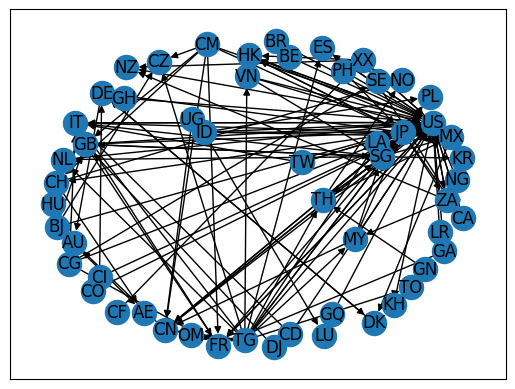

In [14]:
nx.draw_networkx(G, pos=nx.spring_layout(G, k=20))  

---
## G. Draw customised MultiDiGraph

<font color="green">***G. Intro***    
*- FYI networkx is not a plotting library!! As per the docs, *"In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package", and they "highly recommend that people visualize their graphs with tools dedicated to that task"* -> https://networkx.org/documentation/stable/reference/drawing.html#drawing*    
*- Because constructing matplotlib-drawn networkx graphs has low transferability, we use this section to demonstrate ideas for fine-tuning network visualisations, not recommending specific implementations.*    

>**G0.** Prepare the 2 numpy arrays, `scaled_drawing_values` and `custom_edge_colors`, that will be used to draw the edges of our `MultiDigraph` with varying widths and colours proportional to their weight (i.e. quantity).  
>
>```
list_drawing_values = []
for i in G.edges(data=True):
    list_drawing_values.append( i[2]["weight"] )
>
>scaled_drawing_values = np.digitize(list_drawing_values, bins=np.arange(0, 320000, 40000))
>
>cmap = plt.colormaps["RdYlGn_r"]
norm_class = plt.Normalize(vmin=min(scaled_drawing_values), vmax=max(scaled_drawing_values))    # Actual values are vmin=1, vmax=8
custom_edge_colors = cmap(norm_class(scaled_drawing_values))
```

In [15]:
list_drawing_values = []
for i in G.edges(data=True):
    list_drawing_values.append( i[2]["weight"] )

scaled_drawing_values = np.digitize(list_drawing_values, bins=np.arange(0, 320000, 40000))

cmap = plt.colormaps["RdYlGn_r"]
norm_class = plt.Normalize(vmin=min(scaled_drawing_values), vmax=max(scaled_drawing_values))    # Actual values are vmin=1, vmax=8
custom_edge_colors = cmap(norm_class(scaled_drawing_values))

>**G1.** Draw a customised matplotlib visualisation of our Pangolin trade network with a plotting routine that exploits more of the available options, i.e. function to draw just nodes, just node labels etc.
>
>**Code Detail:** Note that we are using `named colors` recognised by matplotlib as keyworded arguments to override the defaults (as per F1. blue for `node_color`, black for the `font_color`). See docs for full options -> https://matplotlib.org/stable/gallery/color/named_colors.html
>
>**Tech Note:** An alternative/popular layout is the `kamada_kawai_layout()`, but requires the scipy package. 
>```
plt.figure(figsize=(12,12))    # Create an empty matplotlib Figure - use the figsize parameter to control the (<width>, <height>), apparently in inch units
pos = nx.spring_layout(G, k=40, seed=7)    # Pass any integer as the `seed` argument    
nx.draw_networkx_nodes(G, pos, node_color="black", node_size=1000)
nx.draw_networkx_labels(G, pos, font_color="white", font_size=18)
nx.draw_networkx_edges(G, pos, width=scaled_drawing_values, edge_color=custom_edge_colors, arrows=True, arrowsize=12, min_target_margin=20)
plt.axis("off")
#plt.tight_layout()
#plt.savefig("<SomeFilename>.png", dpi=600)    # Save the Figure/Axes using matplotlib - use the optional dpi (dots-per-inch) argument to control the resolution of the png
plt.show()    # Display the plot
```

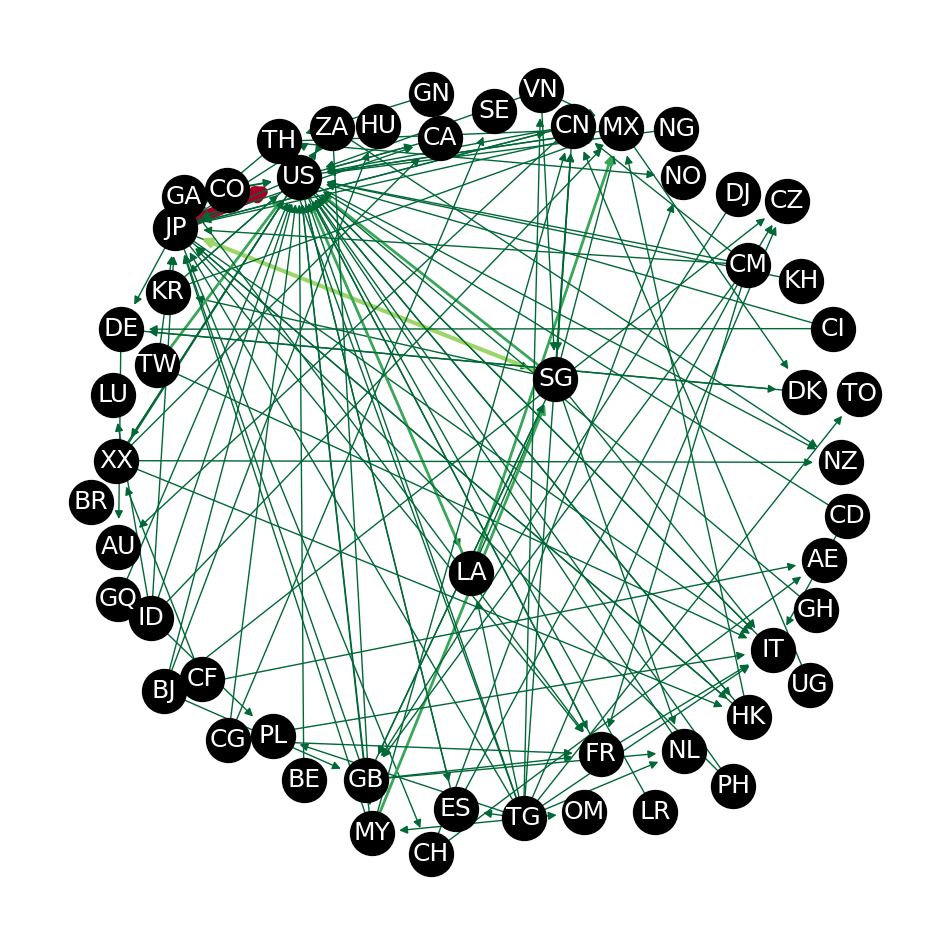

In [16]:
plt.figure(figsize=(12,12))    # Create an empty matplotlib Figure - use the figsize parameter to control the (<width>, <height>), apparently in inch units
pos = nx.spring_layout(G, k=40, seed=7)    # Pass any integer as the `seed` argument    
nx.draw_networkx_nodes(G, pos, node_color="black", node_size=1000)
nx.draw_networkx_labels(G, pos, font_color="white", font_size=18)
nx.draw_networkx_edges(G, pos, width=scaled_drawing_values, edge_color=custom_edge_colors, arrows=True, arrowsize=12, min_target_margin=20)
plt.axis("off")
#plt.tight_layout()
#plt.savefig("<SomeFilename>.png", dpi=600)    # Save the Figure/Axes using matplotlib - use the optional dpi (dots-per-inch) argument to control the resolution of the png
plt.show()    # Display the plot

<font color="green">***G1. Comments***        
*- A few of the further caveats/considerations re. drawing inferences from our Pangolin trade network graph include possible range in the quality of trade monitoring and record-keeping by country, as well as influential geopolitical factors, for example not all countries are Parties to the Convention, or have been at all times, plus there were changes to country boundaries/existence between 1975 to 2022.*

---
## H. Beyond visualising networks graphs

<font color="green">***H. Intro***    
*- Visualising the Pangolin trade network is already helpful, but is really just the beginning, not the end, of what's possible in terms of exploring Wildlife Trade with Python.*    
*- Natural next steps would be networkx's Centrality Measures, and Community Detection algorithms. However, let's end this Exploration with a quick look at Degree Centrality, where a node's degree is the number of connections it has. This is the simplest approach to identifying important nodes.*

>**H0.** Although we could have calculated this at earlier stages/other points, let's use our network graph's method `number_of_nodes()` to return how many nodes, and therefore unique countries, are in our network.
>```
G.number_of_nodes()
```

In [17]:
G.number_of_nodes()

55

>**H1.** Whilst our network visualisation shows (within the confines of our custom framework) the important nodes/countries involved in the Pangolin trade by eye, we can refer to actual metrics too. Use networkx centrality functionality to compute the degree centrality for all nodes in our graph `G`. The degree centrality for a node is the fraction of nodes it is connected to, and represents an importance score. 
>
>**Tech Note:** See networkx example -> https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html#degree-centrality
>```
nx.centrality.degree_centrality(G)
```

In [18]:
nx.centrality.degree_centrality(G)

{'JP': 0.42592592592592593,
 'US': 0.9074074074074073,
 'SG': 0.25925925925925924,
 'LA': 0.09259259259259259,
 'TW': 0.05555555555555555,
 'MX': 0.2037037037037037,
 'MY': 0.1111111111111111,
 'TH': 0.12962962962962962,
 'ID': 0.09259259259259259,
 'PH': 0.037037037037037035,
 'VN': 0.07407407407407407,
 'KR': 0.07407407407407407,
 'UG': 0.018518518518518517,
 'CN': 0.18518518518518517,
 'IT': 0.16666666666666666,
 'XX': 0.1111111111111111,
 'FR': 0.14814814814814814,
 'ZA': 0.09259259259259259,
 'HK': 0.1111111111111111,
 'TG': 0.25925925925925924,
 'ES': 0.05555555555555555,
 'NL': 0.07407407407407407,
 'CA': 0.07407407407407407,
 'GN': 0.018518518518518517,
 'CO': 0.018518518518518517,
 'GB': 0.16666666666666666,
 'DK': 0.05555555555555555,
 'CH': 0.07407407407407407,
 'DE': 0.09259259259259259,
 'CM': 0.12962962962962962,
 'TO': 0.018518518518518517,
 'BJ': 0.09259259259259259,
 'OM': 0.018518518518518517,
 'CZ': 0.05555555555555555,
 'CD': 0.037037037037037035,
 'LR': 0.018518518

>**H2.** Let's sort the above dictionary result by highest to lowest degree centrality, and select just the top 10 elements/countries.
>```
sorted(nx.centrality.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)[:10]
```

In [19]:
sorted(nx.centrality.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)[:10]

[('US', 0.9074074074074073),
 ('JP', 0.42592592592592593),
 ('SG', 0.25925925925925924),
 ('TG', 0.25925925925925924),
 ('MX', 0.2037037037037037),
 ('CN', 0.18518518518518517),
 ('IT', 0.16666666666666666),
 ('GB', 0.16666666666666666),
 ('FR', 0.14814814814814814),
 ('TH', 0.12962962962962962)]

<font color="green">***H2. Comment***    
*- The values can be interpreted as the US has the highest degree centrality with 0.907, meaning it's the country (within our specific analysis) that has traded in Pangolins with the most other countries, i.e. ~91% of the 55 countries in this network (equating to 49 countries, according to `G.degree["US"]`).*